# Natural Language Processing (NLP)

In this tutorial we'll learn how we can process natural language documents into a form understandable by computers. 

Up till now, we've only seen **structured data**. Structured data, are data that are organized in a known *schema*. We know what features there are and in most cases what each feature corresponds to. Some examples of structured data are DataFrames, spreadsheets and relational databases.

In contrast, natural language is, by its nature, **unstructured**, meaning that we don't know the *schema* of the data. Finding a *structure* that describes the data is necessary in order to feed them into a ML model. This will be our main goal during this tutorial.

For NLP we will be using python's [Natural Language Toolkit](http://www.nltk.org/), as well as several functions from scikit-learn. More information about the library's functionality can be found in the [NLTK book](http://www.nltk.org/book/).

In [1]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

NTLK is a vast library that includes multiple sub-modules. When installed, NLTK is striped down to its most basic functionality. To access the more complex sub-modules, we need to manually download each one. This can be done through `nltk.download()`. We'll see how this is used in practice.

## Loading corpora

There are three main ways of loading a document corpus in python:

- **Download through a python library**.  
If we want to download a well-known dataset, chances are we can do it through a library like scikit-learn or nltk. For instance, the [reuters dataset](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection), can be retrieved through ntlk:

```python
nltk.download('reuters')  # download the dataset

from nltk.corpus import reuters  # import it

print('The dataset has a total of {} categories:'.format(len(reuters.categories())))
print(reuters.categories()[:10])  # print first 10 category names
print(reuters.fileids('category name'))  # print the file ids for a category, given its name 
```

- **Download directly from the internet**.  
If a document is available in the internet, we can retrieve using urllib:

```python
import urllib
url = 'http://www.gutenberg.org/files/2554/2554-0.txt'  # document's url
response = urllib.urlopen(url)  # send the request
raw = response.read().decode('utf8')  # store the document in s tring
print(raw[:500])  # print its 500 first characters
```

- **Load from a local file**.  
If we've already downloaded the document in our computer, we'll just need to load it. We've seen how do so in a previous tutorial.

```python
with open('mydoc.txt', 'r') as f:  # open 'mydoc.txt' for reading
    document = ''
    for line in f:  # read each line of the text file one at a time
        document += line  # store it to a string
```

## Typical NLP workflow

The goal of any NLP workflow is to **remove** any **unnecessary content** from the document and **structure** it as best as possible.

Suppose we've loaded a document using one of the previous methods.

In [2]:
document = """
Commerce Secretary Malcolm Baldrige
said he supported efforts to persuade newly-industrialized
countries (NICS) to revalue currencies that are tied to the
dollar in order to help the United States cut its massive trade
deficit.
    "We do need to do something with those currencies or we
will be substituting Japanese products for Taiwanese products,"
or those of other nations with currencies tied to the dollar,
Baldrige told a House banking subcommittee.
    The U.S. dollar has declined in value against the Yen and
European currencies, but has changed very little against the
currencies of some developing countries such as South Korea and
Taiwan because they are linked to the value of the dollar.
    As a result, efforts to reduce the value of the dollar over
the past year and a half have done little to improve the trade
deficits with those countries.
    Baldrige told a House Banking subcommittee that the
Treasury Department was attempting to persuade those countries
to reach agreement with the United States on exchange rates.
"""

### String operations

After loading the document, there are a few things we might want to do. First of all, we should convert all the characters to **lowercase**. This is done because the computer treats upper and lower case letters differently (e.g. *Cat* and *cat* are two totally different words for the computer). Afterwards, we'll remove all punctuation from the string and **split** it into words. The goal is to create a list of all the words appearing in the document.

For the first task (i.e. converting the document to lowercase), we can use python's built-in string method `.lower()`.

In [3]:
document = document.lower()
print(document)


commerce secretary malcolm baldrige
said he supported efforts to persuade newly-industrialized
countries (nics) to revalue currencies that are tied to the
dollar in order to help the united states cut its massive trade
deficit.
    "we do need to do something with those currencies or we
will be substituting japanese products for taiwanese products,"
or those of other nations with currencies tied to the dollar,
baldrige told a house banking subcommittee.
    the u.s. dollar has declined in value against the yen and
european currencies, but has changed very little against the
currencies of some developing countries such as south korea and
taiwan because they are linked to the value of the dollar.
    as a result, efforts to reduce the value of the dollar over
the past year and a half have done little to improve the trade
deficits with those countries.
    baldrige told a house banking subcommittee that the
treasury department was attempting to persuade those countries
to reach agreement

For the second task, we'll use string method `.replace()` to remove each punctuation mark. Instead of identifying them manually, they are available in a package called *string*, stored in a variable called `punctuation`.

In [4]:
import string

print(string.punctuation)  # string containing all available punctuation marks

for punct_mark in string.punctuation:  # iterate over all punctuation marks
    document = document.replace(punct_mark, '')  # remove each punctuation mark
    
print(document)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

commerce secretary malcolm baldrige
said he supported efforts to persuade newlyindustrialized
countries nics to revalue currencies that are tied to the
dollar in order to help the united states cut its massive trade
deficit
    we do need to do something with those currencies or we
will be substituting japanese products for taiwanese products
or those of other nations with currencies tied to the dollar
baldrige told a house banking subcommittee
    the us dollar has declined in value against the yen and
european currencies but has changed very little against the
currencies of some developing countries such as south korea and
taiwan because they are linked to the value of the dollar
    as a result efforts to reduce the value of the dollar over
the past year and a half have done little to improve the trade
deficits with those countries
    baldrige told a house banking subcommittee that the
treasury department was attempting to persuade those countries


As for the task of splitting the document into words, one thought could be to use the string method `.split()`. However, besides spaces (`' '`), we need to separate tabs (`\t`), new lines (`\n`), etc. An easier way is available through nltk.

Because words are typically referred to as **tokens**, this process is called **tokenization**.

In [5]:
nltk.download('punkt') # required for the tokenizer

words = nltk.word_tokenize(document)

print(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['commerce', 'secretary', 'malcolm', 'baldrige', 'said', 'he', 'supported', 'efforts', 'to', 'persuade', 'newlyindustrialized', 'countries', 'nics', 'to', 'revalue', 'currencies', 'that', 'are', 'tied', 'to', 'the', 'dollar', 'in', 'order', 'to', 'help', 'the', 'united', 'states', 'cut', 'its', 'massive', 'trade', 'deficit', 'we', 'do', 'need', 'to', 'do', 'something', 'with', 'those', 'currencies', 'or', 'we', 'will', 'be', 'substituting', 'japanese', 'products', 'for', 'taiwanese', 'products', 'or', 'those', 'of', 'other', 'nations', 'with', 'currencies', 'tied', 'to', 'the', 'dollar', 'baldrige', 'told', 'a', 'house', 'banking', 'subcommittee', 'the', 'us', 'dollar', 'has', 'declined', 'in', 'value', 'against', 'the', 'yen', 'and', 'european', 'currencies', 'but', 'has', 'changed', 'very', 'little', 'against', 'the', 'currencies', 'o

### Stopword removal

The next step involves reducing the number of tokens, with a minimal loss of the semantic content of the document. Why this is necessary will become apparent later on. The easiest thing to do is to remove the **stopwords** (i.e. common words that exist in almost every document and don't contribute to its semantic content). Some examples of stopwords are *"and"*, *"this"*, *"that"*, *"me"*, etc.

This can be easily done again through nltk. 

In [6]:
nltk.download('stopwords')  # download a file containing english stopwords

from nltk.corpus import stopwords

filtered_words = [word for word in words if word not in stopwords.words('english')]  # filter out stopwords

print(filtered_words)
print('length before stopword removal:', len(words))
print('length after stopword removal:', len(filtered_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['commerce', 'secretary', 'malcolm', 'baldrige', 'said', 'supported', 'efforts', 'persuade', 'newlyindustrialized', 'countries', 'nics', 'revalue', 'currencies', 'tied', 'dollar', 'order', 'help', 'united', 'states', 'cut', 'massive', 'trade', 'deficit', 'need', 'something', 'currencies', 'substituting', 'japanese', 'products', 'taiwanese', 'products', 'nations', 'currencies', 'tied', 'dollar', 'baldrige', 'told', 'house', 'banking', 'subcommittee', 'us', 'dollar', 'declined', 'value', 'yen', 'european', 'currencies', 'changed', 'little', 'currencies', 'developing', 'countries', 'south', 'korea', 'taiwan', 'linked', 'value', 'dollar', 'result', 'efforts', 'reduce', 'value', 'dollar', 'past', 'year', 'half', 'done', 'little', 'improve', 'trade', 'deficits', 'countries', 'baldrige', 'told', 'house', 'banking', 'subcommittee', 'tre

This way, we cut the size of the document by around half, without removing any of the words that define its meaning.

## Stemming & Lemmatization

Words in a document may appear in different lexical forms (e.g. *play*, *plays*, *playing*, *played*). While we, as humans, understand that all of these words relay the same meaning, the computer recognizes them as different. To resolve this, there are a couple of techniques (i.e. stemming and lemmatization) that aim to reduce a word to its inflectional form.

**Stemming** refers to the process of reducing words to their *stem*. This is most commonly done by cutting their suffixes.

**Lemmatization** is a procedure where a word is reduced to its *lemma* (or dictionary form). 

Both have a similar goal, but approach it differently. Stemming is usually the crude heuristic of chopping off parts of the word, while lemmatization uses a dictionary and attempts to perform a morphological analysis of the word. 

In [7]:
# required downloads for the stemmer/lemmatizer
nltk.download('wordnet')
nltk.download('rslp')

# we'll be using the wordnet lemmatizer and the porter stemmer
from nltk.stem import WordNetLemmatizer  
from nltk.stem.porter import PorterStemmer

wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

# apply stemming/lemmatization to each word in the document
lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
stem_words = [porter_stemmer.stem(word) for word in filtered_words]

# print results for comparison
print('\n{:<20} {:<20} {:<20}'.format('Original', 'Stemmed', 'Lemmatized'))
print('-'*60)
for i in range(len(filtered_words)):
    print('{:<20} {:<20} {:<20}'.format(filtered_words[i], stem_words[i], lem_words[i]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\thano\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!

Original             Stemmed              Lemmatized          
------------------------------------------------------------
commerce             commerc              commerce            
secretary            secretari            secretary           
malcolm              malcolm              malcolm             
baldrige             baldrig              baldrige            
said                 said                 said                
supported            support              supported           
efforts              effort               effort              
persuade             persuad              persuade            
newlyindustrialized  newlyindustri        newlyindustrialized 
co

Feel free to try out different stemmers or lemmatizers and select whichever you prefer.

Once we have completed all linguistic pre-processing steps, we can move on to the next task: to structure the input (i.e. to convert the document to a form recognizable by ML algorithms). The algorithms we've seen up till now could only handle **vectors** (i.e. a series of numbers - each corresponding to the value of a specific feature) as input. Each vector will be derived from the terms of a document and should be able to *describe* it. In this sense, documents with similar subjects should have vectors close to one another. Likewise, unrelated documents' vectors should be far apart.

### Bag of Words

Bag-of-words is probably the simplest method of *vectorizing* documents. First, it finds all unique terms in a corpus of documents; think of this as a list of the *features* of the (where each term is a feature). Then, for each document, it counts the number appearances and forms a vector from the unique terms of the first step. 

Like we did in previous tutorials, we won't be using scikit-learn's implementation, to better understand how it works.

In [8]:
doc = 'four three two one four two three four three four' # a random string

from collections import Counter # Counter pretty much does all the work

cnt = Counter(doc.split())
print(cnt)

Counter({'four': 4, 'three': 3, 'two': 2, 'one': 1})


To fully understand how bag-of-words works, we need a corpus of documents. Let's create such, and pre-process them using the steps we saw previously:

In [9]:
# Our new corpus
documents = ["Lionel Messi is the best football player in the world! Messi plays for Barcelona Football Club. Barcelona Football Club plays in the Spanish Primera Division.",
             "Lionel Messi a football player, playing for Barcelona Football Club, a Spanish football team.", 
             "Barcelona is a city in a northern spanish province called Catalonia. It is the largest city in Catalonia and the second most populated spanish city.", 
             "Python is a programming language. Python is an object-oriented programming language. Unlike COBOL, Python is a interpreted programming language.", 
             "COBOL is a compiled computer programming language designed for business use. This programming language is imperative, procedural and, since 2002, object-oriented. But Python is better."]

# Pre-process the documents
def preprocess_document(document):
    # function that performs all linguistic preprocessing steps mentioned previously
    document = document.lower()
    for punct_mark in string.punctuation:
        document = document.replace(punct_mark, '')
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]
    return stemmed_words

preprocessed_documents = [preprocess_document(doc) for doc in documents]

for doc in preprocessed_documents:
    print(doc)

['lionel', 'messi', 'best', 'footbal', 'player', 'world', 'messi', 'play', 'barcelona', 'footbal', 'club', 'barcelona', 'footbal', 'club', 'play', 'spanish', 'primera', 'divis']
['lionel', 'messi', 'footbal', 'player', 'play', 'barcelona', 'footbal', 'club', 'spanish', 'footbal', 'team']
['barcelona', 'citi', 'northern', 'spanish', 'provinc', 'call', 'catalonia', 'largest', 'citi', 'catalonia', 'second', 'popul', 'spanish', 'citi']
['python', 'program', 'languag', 'python', 'objectori', 'program', 'languag', 'unlik', 'cobol', 'python', 'interpret', 'program', 'languag']
['cobol', 'compil', 'comput', 'program', 'languag', 'design', 'busi', 'use', 'program', 'languag', 'imper', 'procedur', 'sinc', '2002', 'objectori', 'python', 'better']


The first step is to create a list of all unique terms in our corpus. This is called a **vocabulary**.

In [10]:
total_counter = Counter(preprocessed_documents[0])

for i in range(1, len(preprocessed_documents)):
    total_counter += Counter(preprocessed_documents[i])

print(total_counter)

Counter({'footbal': 6, 'program': 5, 'languag': 5, 'barcelona': 4, 'spanish': 4, 'python': 4, 'messi': 3, 'play': 3, 'club': 3, 'citi': 3, 'lionel': 2, 'player': 2, 'catalonia': 2, 'objectori': 2, 'cobol': 2, 'best': 1, 'world': 1, 'primera': 1, 'divis': 1, 'team': 1, 'northern': 1, 'provinc': 1, 'call': 1, 'largest': 1, 'second': 1, 'popul': 1, 'unlik': 1, 'interpret': 1, 'compil': 1, 'comput': 1, 'design': 1, 'busi': 1, 'use': 1, 'imper': 1, 'procedur': 1, 'sinc': 1, '2002': 1, 'better': 1})


The above depicts our corpus' vocabulary along with the total number of appearances of each term. Terms appearing only **once** in the whole corpus aren't much useful, as they can't be used see how two documents are similar. In order to reduce the size of the vocabulary we might want to remove terms that appear very few times.

In [11]:
threshold = 1

vocabulary = [word for word in total_counter if total_counter[word] > threshold]  # remove rarely occurring words

print(vocabulary)

['lionel', 'messi', 'footbal', 'player', 'play', 'barcelona', 'club', 'spanish', 'citi', 'catalonia', 'python', 'program', 'languag', 'objectori', 'cobol']


Likewise, terms that appear in almost **every** document aren't very useful and could be removed as well.

We will now complete our bag-of-words model by counting the appearance of each term in every document and placing them all in an array where each line would represent a single document and each row a term. An example of such an array with $N$ documents and $M$ terms, is the following:

 | $t_1$ | $t_2$ | ... | $t_M$  
:-: | :-: | :-: | :-: | :-:  
$d_1$ | 1 | 0 | ... | 2  
$d_2$ | 0 | 0 | ... | 3
... | ... | ... | ... | ...
$d_N$ | 0 | 4 | ... | 0

The number in the position **$(i, j)$** of the array represents **how many times term $t_j$ appears in document $d_i$**.

In [12]:
bag_array = np.zeros((len(preprocessed_documents), len(vocabulary)))  # create an N-by-M arrays

document_counters = [Counter(doc) for doc in preprocessed_documents]  # count terms in each document

for i in range(len(preprocessed_documents)):
    for j in range(len(vocabulary)):
        bag_array[i,j] += document_counters[i][vocabulary[j]]  # populate the array

print(vocabulary, '\n')
print(bag_array)

['lionel', 'messi', 'footbal', 'player', 'play', 'barcelona', 'club', 'spanish', 'citi', 'catalonia', 'python', 'program', 'languag', 'objectori', 'cobol'] 

[[1. 2. 3. 1. 2. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 3. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 2. 3. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2. 1. 1.]]


Now, we've finally reached a point where we have an array we can feed into a ML algorithm! The above array would typically serve as our input array $X$ and depending on whether or not we have labels for each document, we would either have a supervised or an unsupervised problem. This array from this point on should be treated as any other input to a **structured** ML problem (e.g. we could shuffle it, split it into training/test sets, perform any feature scaling/selection/extraction, etc.).

It's time to discuss a couple of interesting properties of problems involving NLP.

1. The first thing to note is that input arrays when dealing with natural language tend to have a **high dimensionality**, especially when using models like bag-of-words, where they treat each unique term as a new feature. This is the reason why, during this tutorial, almost all our pre-processing operations had the goal of reducing the number of terms in the corpus. Think about it:
  - While **lowercasing** our words had the goal of mapping two different words that had the same semantic meaning (e.g. *Cat* and *cat*) to a common term, it had the much desired effect of removing a lot of would-be terms (those that have uppercase characters in them) from the vocabulary.
  - The same can be said for **stemming/lemmatization**.
  - **Stopword removal** had the goal of removing several terms from the vocabulary, that are too common to convey any semantic information.
  - Removing the **least-commonly appearing terms** also had the goal of reducing the vocabulary size.
  - As would removing the **most-common terms**, which was discussed but not performed.
2. Another interesting thing to note about bag-of-words arrays, are how **sparse** they are (i.e. they have a lot of zero elements). This becomes even more apparent in large corpora consisting of documents talking about multiple topics. This property should be taken into account when designing the rest of the ML workflow (pre-processing steps, algorithm, etc.).
3. When counting the number of appearances of every term in each document, no type of scaling was performed regarding the size of the document. This would have the effect of *large* documents having higher values (in the bag-of-words array) than *smaller* ones, which could be an issue if the corpus contains documents with highly-variable in length. This third point will lead us into our next technique which aims at alleviating this issue. 

## TF-IDF

For a better weight assignment to each term, we'll use **TF-IDF** (Term Frequency - Inverse Document Frequency).

As implied by its name, tf-idf consists of 2 terms. The first one is **Term Frequency (TF)**:

$$ tf(t_j, d_i) = \frac{f(t_j, d_i)}{\sum_{t} f(t, d_i)}$$

Where $t_j$ is a term in document $d_i$. *TF* essentially represents the frequency with which a term appears in a document. Terms with a large frequency as assigned a larger weight (and as a result are more important) than terms with a small frequency. This alleviates the problem of documents of varying length, as each term is *normalized* with the total number of terms in the document it appears in.

In [13]:
print(bag_array.sum(axis=1), '\n')  # number of terms per document

freq_array = np.zeros(shape=bag_array.shape)

for i in range(len(bag_array)):
    freq_array[i, :] = bag_array[i, :] / bag_array.sum(axis=1)[i] # term frequency
                                                                  # (term appearances / number of terms in document)     
                                                                    
print(np.round(freq_array, 3))

[14. 10.  8. 11.  7.] 

[[0.071 0.143 0.214 0.071 0.143 0.143 0.143 0.071 0.    0.    0.    0.
  0.    0.    0.   ]
 [0.1   0.1   0.3   0.1   0.1   0.1   0.1   0.1   0.    0.    0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.125 0.    0.25  0.375 0.25  0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.273 0.273
  0.273 0.091 0.091]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.143 0.286
  0.286 0.143 0.143]]


The second term in tf-idf is the **Inverse Document Frequency**:

$$ idf(t_j) = log \left( \frac{N}{df(t_j)} \right)$$

Where $N$ is the number of documents and $df(t_j)$ is the number of documents where term $t_j$ appears in. *IDF* is a measure of the **information** that each term conveys. If a term appears in every document, then that term's *IDF* would become equal to $0$ (the fraction would have a value of $1$). Likewise, if a term appears only in a few of the documents, its *IDF* would be relatively large.

In [14]:
non_zero_elements_per_row = np.count_nonzero(bag_array, axis=0)  # np.count_zero counts how many non-zero elements an array has
                                                                 # we are interested in counting this along each column

idf = np.log10(float(len(bag_array))/non_zero_elements_per_row)  # the nominator is the number of documents 
                                                                 # (or the number of lines in 'bag_array')
                                                                 # the denominator is the number of non-zero 
                                                                 # elements that each column of 'bag_array' has
print(np.round(idf, 3))

[0.398 0.398 0.398 0.398 0.398 0.222 0.398 0.222 0.699 0.699 0.398 0.398
 0.398 0.398 0.398]


To fully grasp how exactly the denominator is calculated, you can look at an equivalent code: 

```python
non_zero_elements_per_row = np.zeros((len(bag_array[0])))

for i in range(len(bag_array)):
    for j in range(len(bag_array[0])):
        if bag_array[i,j] > 0.0:
            non_zero_elements_per_row[j] += 1
```
Finally, we can calculate tf-idf as the product of its two terms:

$$tf{\text -}idf(t_j, d_i) = tf(t_j, d_i) \cdot idf(d_i)$$

In [15]:
tf_idf = freq_array * idf  # tf-idf is the product of tf with idf

print(np.round(tf_idf, 3))

[[0.028 0.057 0.085 0.028 0.057 0.032 0.057 0.016 0.    0.    0.    0.
  0.    0.    0.   ]
 [0.04  0.04  0.119 0.04  0.04  0.022 0.04  0.022 0.    0.    0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.028 0.    0.055 0.262 0.175 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.109 0.109
  0.109 0.036 0.036]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.057 0.114
  0.114 0.057 0.057]]


Let's now try to see if our model makes sense. 

We'll calculate the distances amongst each of the five documents, to see which ones are close to one another. 

In [16]:
distances = np.zeros((len(tf_idf), len(tf_idf)))

for i in range(len(tf_idf)):
      for j in range(len(tf_idf)):
            distances[i,j] = sum(np.abs(tf_idf[i] - tf_idf[j]))  # sum of absolute distance of the tf-idf vectors of each document

print(distances)

[[0.         0.12385863 0.79310084 0.75814618 0.75814618]
 [0.12385863 0.         0.79403179 0.76066177 0.76066177]
 [0.79310084 0.79403179 0.         0.91798954 0.91798954]
 [0.75814618 0.76066177 0.91798954 0.         0.10336104]
 [0.75814618 0.76066177 0.91798954 0.10336104 0.        ]]


As expected, the first two documents are close to one another, as their distance is small (around $0.12$). The same can be said for the last two documents (distance of around $0.1$). In contrast, all unrelated documents have a distance larger than $0.7$.

The tf-idf array, like the bag-of-words array before, can be input in any ML workflow. 

We'll attempt to do so now. Because we don't have any labels available for the documents, we are forced to take an unsupervised approach. We'll use a k-means algorithm we discussed in the previous tutorial, which will aim at separating the documents into clusters. Since we are aware of the context of the documents, we can empirically evaluate the results. We'd expect the first two documents to end up in the same cluster and the last two in another.

In [17]:
from sklearn.cluster import KMeans

km = KMeans(3, random_state=99)
km.fit_predict(tf_idf)

array([0, 0, 2, 1, 1])

As expected, the first two documents ended up in the same cluster, as did the last two. The 3rd document which was unrelated got its own cluster. As a second example we'll see a clustering technique that doesn't require us to explicitly select the number of clusters.

# Hierarchical Clustering

Hierarchical clustering algorithms approach clustering differently to the centroid-based ones (like k-means). Their goal is to hierarchically cluster their input, with each cluster composed of sub-clusters, finally forming a tree-like structure.

![](http://www.alglib.net/dataanalysis/i/clusters_ahc.png)

There are two categories of hierarchical clustering algorithms:

- **Agglomerative**, or bottom-up hierarchical clustering algorithms, start by assuming that each example is its own cluster and then begin merging clusters

- **Divisive**, or top-down algorithms, start by assuming that every example belongs to a single cluster and then begin splitting this cluster into sub-clusters.

Hierarchical clustering algorithms make use of the distances between the training examples to merge or split clusters. Unlike k-means, in hierarchical clustering algorithms, it isn't necessary to specify the number of clusters ($k$) a-priori.

The algorithm we'll see, belongs to the first category and uses [Ward's minimum variance method](https://en.wikipedia.org/wiki/Ward%27s_method) for merging clusters together. This recursively looks for the pair of clusters, that when merged, will amount to the least increase to the total internal variance of the clusters. *(Note: with the term internal variance, we mean the variance of the the examples within a certain cluster. Total internal variance is the sum of the internal variances for all clusters.)*

Initially, each example is considered to be one cluster. Then it looks for the pair of clusters that would lead to the least increase in total internal variance, if merged (i.e. Ward's method). Those two clusters are merged into one and the procedure is repeated until 2 clusters are left.

The above can be simply implemented with [scikit-learn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html):

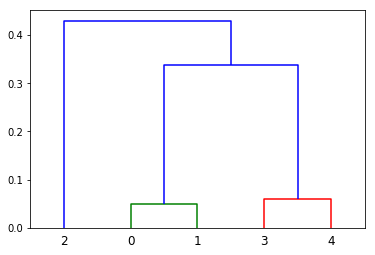

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(tf_idf, 'ward')  # train the algorithm

dendrogram(Z)  # plots a dendrogram with the results of the clustering algorithm

print()

As expected, the documents that are close to one another, ended up in the same cluster. 

Let's try to apply what we've learned to a more complex example.

## NLP/Clustering example

For the example we'll use the [20 Newsgroups](http://qwone.com/~jason/20Newsgroups/) dataset, which is available through [sklearn](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [19]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='all')

For the results to be better interpretable, we'll just include 3 categories from the dataset, each consisting of 5 documents. To make our lives easier, the categories will be rather distinct.

In [20]:
from functools import reduce

categ = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']

data = reduce(lambda x,y: x+y, [fetch_20newsgroups(categories=[x], remove=('headers', 'footers'))['data'][:5] for x in categ])

print('Input shape:', len(data), '\n')
print(data[0][:500])

Input shape: 15 

In <16BA7103C3.I3150101@dbstu1.rz.tu-bs.de> I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau) writes:

>In article <1993Apr5.091258.11830@monu6.cc.monash.edu.au>
>darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
> 
>(Deletion)
>>>>Of course people say what they think to be the religion, and that this
>>>>is not exactly the same coming from different people within the
>>>>religion.  There is nothing with there existing different perspectives
>>>>within the religion -- perhaps one can say that they t


This time around, instead of preprocessing the documents manually, we'll use scikit-learn's [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), which can support every [pre-processing](http://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes) we previously saw (stopwords, stemming, lemmatizing, κτλ). We'll also use two extra parameters: `max_df=x`, which ignores any terms that appear in documents with a frequency larger than `x` (i.e. the most common terms) and `max_df=y`, which ignores terms that appear less than `y` times in the corpus (i.e. the least common terms). For this example we won't be performing any stemming/lemmatizing, but the vectorizer does support this functionality (see link above).  

TF-IDF array shape: (15, 124)



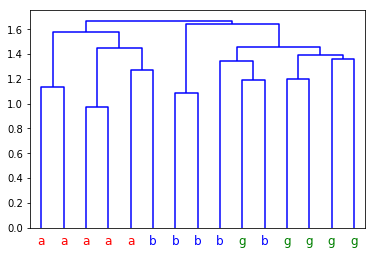

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')  # remove terms appearing in more than 50% of the documents
                                                                          # remove terms appearing less than 2 times in the corpus
                                                                          # remove english stopwords

tf_idf_array = vectorizer.fit_transform(data).toarray()  # returns a sparse matrix, to convert it to a regular array we use .toarray()

print('TF-IDF array shape:', tf_idf_array.shape)

Z = linkage(tf_idf_array, 'ward')

labels = ['a'] * 5 + ['g'] * 5 + ['b'] * 5 # 'a' = atheism, 'g' = graphics, 'b' = baseball 

dendrogram(Z, labels=labels, color_threshold=0)

colors = {'a': 'r', 'g': 'g', 'b': 'b'}

for l in plt.gca().get_xticklabels():
    l.set_color(colors[l.get_text()])
    
print()

The algorithm did a good enough job of placing similar documents in the same clusters, as we can see from above. Another thing to note is that hierarchical alrorithms are capable of identifying hierarchies within groups of similar documents. Also in a truly unsupervised setting the labels/colors in the x-axis would **not** be available.

Let's try to do the same thing with **k-means**, this time with a few more documents per category 

In [22]:
data = reduce(lambda x,y: x+y, [fetch_20newsgroups(categories=[x], remove=('headers', 'footers'))['data'][:100] for x in categ])

print('Total number of documents:', len(data))

Total number of documents: 300


Now, we'll run k-means for multiple values of $k$, like we did in the previous tutorial, to see if it can identify any distinct number of clusters.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

tf_idf_array = vectorizer.fit_transform(data)  # vectorizer with the same parameters as before

silhouette_scores = []
for k in range(2, 10):
    km = KMeans(k)
    preds = km.fit_predict(tf_idf_array)
    silhouette_scores.append(silhouette_score(tf_idf_array, preds))

Finally, we'll plot the silhouette scores and identify the best $k$. This will represent the number of clusters our documents belong in.

Maximum average silhouette score for k = 3


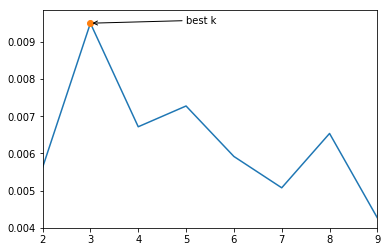

In [24]:
plt.plot(range(2, 10), silhouette_scores, zorder=-1)
best_k = np.argmax(silhouette_scores) + 2  # +2 because range() begins from k=2 and not 0
plt.scatter(best_k, silhouette_scores[best_k-2], color='#ff7f0e') # for the same reason the best k is -2 from the list index
plt.xlim([2,9])
plt.annotate("best k", xy=(best_k, silhouette_scores[best_k-2]), 
             xytext=(5, silhouette_scores[best_k-2]), arrowprops=dict(arrowstyle="->"))  # add annotation
print('Maximum average silhouette score for k =', best_k)

With the silhouette criterion we found 3 clusters in our dataset, which we know to be the correct number. 

Let's print the assignments made by k-means:

In [25]:
km = KMeans(best_k)
km.fit(tf_idf_array)
print(km.labels_)

[2 1 1 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 0 2 2 1 1 2 2 2 1 2 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 2 2 1 2 1 2 1 2 2 0 1 2 2 1 2 2 1 1 0 1 2 1 1 1 2 2 2 2 1 1
 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1]


Because we haven't shuffled our dataset, we know that the first 100 documents belong in the first category, the next 100 in the second and so on. We can see that k-means did pretty well in clustering the documents.

In a truly unsupervised problem we wouldn't have any means of evaluating the results of the clustering. One thing we can do is to print the top terms in each cluster. This way we can have an idea on the context of the documents in each cluster.

In [26]:
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(best_k):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :20]:
        out += ' %s' % terms[ind]
    print(out)

Cluster 0: image thanks graphics hi know files program file card does mail information looking appreciated help use software images color vga
Cluster 1: edu article baseball year don just game like team think better games know people good way time new really hitter
Cluster 2: god edu think people atheism com exist article islam don believe does objective morality livesey moral true just islamic motto


This way we can get an intuition on what the documents of each cluster are about.

We can even use a larger value for $k$ to see if there are any sub-categories in our documents.

In [27]:
km = KMeans(8)
km.fit(tf_idf_array)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(7):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :20]:
        out += ' %s' % terms[ind]
    print(out)

Cluster 0: islam jaeger bu islamic muslim rushdie gregg god edu muslims uk buphy law argument book article laws khomeini true women
Cluster 1: year better hitter game team games good edu hit pitching baseball players season article like league com new braves play
Cluster 2: thanks card does windows driver know runs hi vga advance viewer files postscript subject looking send graphics texas svga gl
Cluster 3: god edu think atheism believe article exist universe don list said motto existence does com clemens going like bible question
Cluster 4: morality keith livesey moral caltech jon com natural objective sgi edu people think don gifs wrong species article mil immoral
Cluster 5: graphics mail newsgroup know just baseball info article edu week thanks comp hardware code lot group read email programmer databases
Cluster 6: image program version file images files software use using thanks knows data hi ellipse tga problem code know called convert


## Final remarks

The methodologies we saw in this tutorial for converting natural language documents to a structured form, are called [Vector Space Model](https://en.wikipedia.org/wiki/Vector_space_model). The vector used to represent a document is called an **embedding**.

One thing you should take away when dealing with these types of models, is that **reducing** the size of the vocabulary (i.e. the number of dimensions) with NLP methods (stemming/lemmatization, frequent/rarest term removal, etc.), usually outperforms doing the same thing with standard ML pre-processing (feature selection, PCA, etc.). Both methods should be used with a measure; you don't want to sacrifice any important features for the sake of dimensionality reduction.

As a final word, unsupervised NLP problems can be **very** difficult. The categories we selected for this tutorial are easily distinguishable; a fact that helped us achieve a good performance. Don't expect this to always be the case.